# Feature Selection Techniques

## Definition

Feature selection is a process of choosing independent variables that have more influence in predicting the target or response variable. 

> In **machine learning** and **statistics**, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

This notebook is compiled from various sources and one of the primary sources is [Chris Alban](https://chrisalbon.com/)

## Types of Feature Selection

The feature selection methods are grouped into three based on how they combine selection algorithm and the model building.

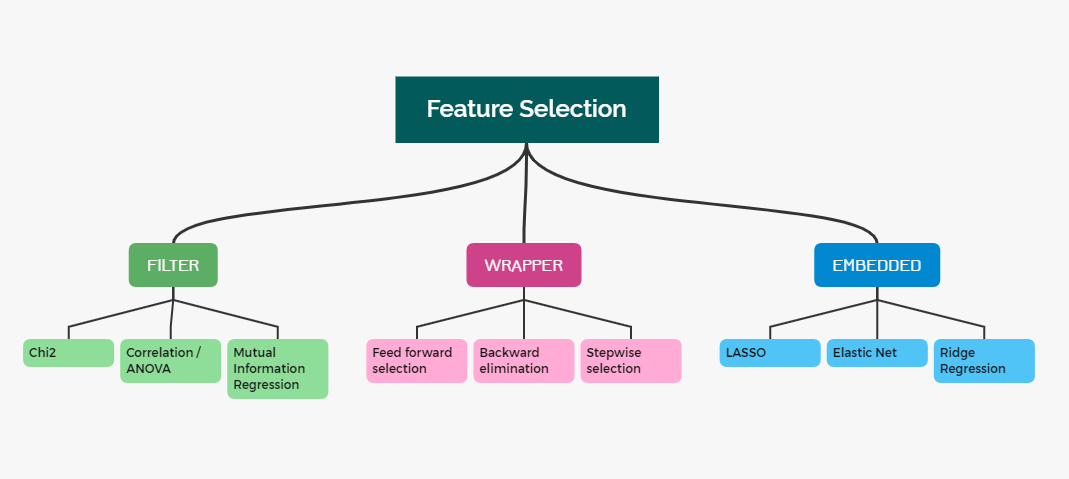

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV, VarianceThreshold
from sklearn import linear_model, datasets

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Drop highly correlated features

In [ ]:
X = np.array([[1,1,1],
              [2,2,0],
              [3,3,1],
              [4,4,0],
              [5,5,1],
              [6,6,0],
              [7,7,1],
              [8,7,0],
              [9,7,1]])

# Create dataframe
data_frm = pd.DataFrame(X)

data_frm

In [ ]:
# Get the correlation matrix
corr_matrix = data_frm.corr().abs()

corr_matrix

In [ ]:
# Select the upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)

# Pick the column that has correlation more than 0.95
to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]

In [ ]:
data_frm.drop(to_drop, axis=1)

## 2. Recursive Feature Elimination

### Create Data

In [ ]:
X, y = make_regression(n_samples=10000, 
                      n_features=100,
                      n_informative=2,
                      random_state=1)

print(X.shape, y.shape)
# Creating linear model

lr_model = linear_model.LinearRegression()

In [ ]:
# Recursive feature elimination

rfecv = RFECV(estimator=lr_model, step=1, scoring='neg_mean_squared_error')

rfecv.fit(X, y)

rfecv.transform(X)


In [ ]:
rfecv.n_features_

## 3. Variance Thresholding 

This method removes all low-variance features. This feature algorithm looks only the features(X) not the desired outputs(y) and thus can be used for unsupervised learning. 

### Binary Features

In Bernauli trail there will be only two outcomes, 1-success and 0-failure. The variance will be calculated as: $Var(x) = p(1-p)$
    
Where, p - Probability of success, q or (1-p) - Probability of failure

In [ ]:
X = [[0,1,0],
    [0,1,1],
    [0,1,0],
    [0,1,1],
    [0,1,0],
    [1,0,0]]

In [ ]:
# Variance Threshold
thresholder = VarianceThreshold(threshold=(0.75 * (0.25)))
thresholder.fit_transform(X)

### Non-Binary Features

In [ ]:
iris_data = datasets.load_iris()

X = iris_data.data
y = iris_data.target


In [ ]:
# Create VarianceThreshold object with variance threshold above 0.5
thresholder = VarianceThreshold(threshold=0.5)

# Conduct variance threshold
X_high_variance = thresholder.fit_transform(X)

In [ ]:
print(len(X_high_variance))
X_high_variance[0:5]